In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import files
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset Loaded Successfully!")
print(df.head())



Saving iot_patient_monitoring.csv to iot_patient_monitoring.csv
Dataset Loaded Successfully!
   Patient_ID  Age  Gender  Heart_Rate  Blood_Pressure  Oxygen_Level  \
0           1   69    Male          88             106            94   
1           2   32    Male          64             161            95   
2           3   89  Female         117             108            90   
3           4   78    Male         117              94            86   
4           5   38  Female         118             112            85   

   Temperature Movement_Activity  Device_ID  Hospital_ID Admission_Type  \
0         35.2          Moderate       1209           27        Routine   
1         37.9          Moderate       1431           18      Emergency   
2         36.7               Low       1795           13        Routine   
3         37.3               Low       1804           18      Emergency   
4         36.2               Low       1329           11      Emergency   

   Length_of_Stay Insur

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from google.colab import files

# Step 1: Upload dataset manually
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Step 2: Normalize column names (fix case, spaces, special characters)
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

# Step 3: Verify column names after cleanup
print(df.columns)

# Step 4: Now access 'gender' safely
if 'gender' in df.columns:
    print(df['gender'].head())  # Print first few values
else:
    print("Column 'gender' not found in the dataset!")


Saving iot_patient_monitoring.csv to iot_patient_monitoring (1).csv
Index(['patient_id', 'age', 'gender', 'heart_rate', 'blood_pressure',
       'oxygen_level', 'temperature', 'movement_activity', 'device_id',
       'hospital_id', 'admission_type', 'length_of_stay', 'insurance_provider',
       'billing_amount', 'test_results'],
      dtype='object')
0      Male
1      Male
2    Female
3      Male
4    Female
Name: gender, dtype: object


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# Step 1: Upload Dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Step 2: Clean Column Names
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

# Step 3: Convert Categorical Data
df['gender'] = df['gender'].astype('category').cat.codes
df['admission_type'] = df['admission_type'].astype('category').cat.codes
df['insurance_provider'] = df['insurance_provider'].astype('category').cat.codes
df['test_results'] = df['test_results'].astype('category').cat.codes  # Target variable

# Step 4: Check for Missing Values
df.fillna(df.mean(), inplace=True)

# Step 5: Visualizing Data Trends
plt.figure(figsize=(10, 5))
sns.boxplot(x='age', y='heart_rate', data=df)
plt.title("Heart Rate vs Age Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 6: Split Data for Machine Learning
X = df[['age', 'gender', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature']]
y = df['test_results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Model (RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Display Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importance in Predicting Test Results")
plt.show()


Saving iot_patient_monitoring.csv to iot_patient_monitoring (2).csv


TypeError: Could not convert ['ModerateModerateLowLowLowHighModerateModerateLowLowLowLowHighModerateHighModerateHighModerateHighModerateHighModerateLowModerateModerateHighLowHighModerateModerateModerateModerateHighLowModerateHighHighHighHighHighModerateModerateLowLowLowLowHighHighHighHighHighHighHighHighLowModerateLowHighHighHighModerateHighHighLowLowHighModerateModerateLowLowModerateLowHighHighHighHighLowHighHighHighHighModerateHighLowHighModerateHighLowLowModerateLowLowLowModerateModerateModerateModerateModerateModerateModerateModerateModerateHighModerateHighModerateModerateModerateHighHighModerateModerateHighModerateModerateHighHighHighModerateHighModerateLowLowModerateModerateHighModerateModerateHighModerateLowModerateHighModerateModerateModerateLowHighLowLowHighHighLowLowModerateHighLowModerateLowLowHighLowHighLowModerateHighHighModerateHighModerateHighHighHighHighLowLowLowHighLowHighHighModerateModerateModerateHighModerateModerateHighHighLowHighLowHighModerateHighLowHighHighModerateHighModerateLowHighLowHighModerateHighModerateLowLowModerateHighModerateModerateModerateModerateLowModerateModerateLowLowLowHighHighLowModerateModerateLowLowHighLowHighLowModerateLowModerateLowHighLowModerateModerateModerateLowHighHighHighModerateModerateHighHighLowLowLowHighHighHighModerateHighLowLowModerateLowLowModerateLowModerateLowModerateModerateHighModerateLowHighHighHighModerateModerateHighModerateLowLowLowModerateLowLowModerateModerateLowHighHighModerateModerateModerateHighLowHighModerateHighModerateLowModerateLowLowHighModerateHighModerateModerateModerateHighHighModerateHighModerateHighHighLowHighModerateHighHighModerateHighLowLowLowLowModerateModerateLowModerateHighHighHighLowLowModerateModerateModerateLowModerateHighHighHighLowModerateModerateLowLowHighLowHighHighModerateHighModerateHighModerateLowModerateLowModerateLowLowLowHighLowModerateLowLowModerateLowModerateLowModerateModerateLowLowLowLowLowLowHighLowHighHighHighLowModerateModerateModerateLowModerateModerateLowLowHighLowModerateLowLowModerateModerateLowLowLowModerateHighLowLowLowHighLowHighLowModerateHighModerateLowModerateHighLowModerateHighHighHighModerateHighLowLowHighHighLowLowHighLowHighModerateHighHighModerateHighHighModerateLowLowLowLowLowModerateModerateHighLowModerateModerateLowModerateHighHighLowLowLowHighModerateHighLowModerateHighLowLowModerateHighModerateModerateHighHighHighModerateModerateHighHighModerateHighLowHighLowLowModerateModerateModerateHighModerateHighModerateLowModerateLowHighModerateModerateLowModerateHighLowHighHighLowHighModerateHighModerateLowModerateHighModerateHighModerateLowLowModerateLowModerateHighModerateHighModerateHighLowModerateLowLowHighLowHighLowLowModerateModerateHighLowLowModerateHighModerateLowHighLowModerateHighModerateLowLowModerateLowModerateModerateHighLowLowModerateHighModerateLowHighHighModerateModerateHighLowLowHighModerateModerateLowLowHighLowLowModerateModerateLowModerateModerateModerateLowModerateLowLowHighHighHighLowHighModerateHighLowModerateModerateModerateHighHighHighHighModerateLowHighLowModerateLowLowHighHighModerateHighLowLowLowLowHighModerateHighLowModerateModerateLowLowHighModerateModerateHighLowModerateHighModerateHighModerateLowLowModerateModerateModerateHighLowHighLowLowHighLowLowModerateHighHighLowHighLowLowHighLowModerateHighHighLowHighHighModerateModerateHighLowModerateModerateModerateLowHighHighModerateHighModerateModerateLowLowModerateLowLowLowHighHighLowHighModerateModerateLowLowHighLowLowModerateModerateHighHighHighLowLowLowLowModerateHighHighModerateModerateLowHighHighModerateHighModerateHighModerateLowHighLowModerateHighHighLowLowModerateLowHighHighHighHighLowLowModerateLowModerateLowLowHighLowModerateHighLowHighHighHighModerateModerateLowHighLowModerateHighModerateHighHighHighLowModerateModerateModerateHighLowLowLowLowHighHighLowLowModerateHighLowHighModerateLowHighHighHighHighHighHighModerateHighModerateModerateHighLowHighModerateHighHighHighModerateModerateModerateLowLowLowLowHighLowLowLowHighLowLowLowModerateLowLowLowHighLowLowModerateModerateHighHighLowModerateHighHighModerateLowModerateLowLowModerateLowHighModerateHighLowLowModerateModerateLowModerateLowHighModerateHighModerateHighLowLowLowLowModerateHighModerateModerateLowModerateHighModerateHighLowLowModerateHighLowLowModerateHighLowLowHighModerateModerateLowLowModerateModerateLowHighHighLowLowLowLowModerateHighHighHighModerateLowHighHighModerateLowLowLowHighModerateHighModerateModerateHighModerateModerateModerateLowLowLowLowHighHighHighLowHighLowLowModerateModerateLowModerateModerateModerateModerateHighModerateLowModerateModerateHighHighHighModerateLowHighModerateModerateModerateHighModerateHighModerateLowLowModerateHighModerateLowModerateHighHighHighHighLowHighHighLowHighLowHighHighHighHighModerateModerateHighHighHighModerateHighLowModerateModerateModerateHighLowModerateLowLowLowHighHighHighModerateModerateLowModerateHighHighHighHighLowModerateHighLowModerateLowHighHighHighModerateHighModerateLowModerateLowModerateHighHighLowModerateModerateLowModerateModerateLowLowLowModerateLowLowLowLowHighHighHighLowModerateHighLowHighHighLowLowHighLowHighHighHighHighModerateModerateLowModerateModerateLowHighModerateModerateModerateModerateHighLowModerateModerateModerateModerateLowHighLowModerateModerateLowHighHighHighHighLowLowHighLowLowModerateLowLowHighLowHighModerateModerateLowLowHighModerateHighLowModerateLowModerateHighLowLowModerateHighModerateModerateModerateLowHighHighHighModerateHighHighLowLowLowModerateLowHighLowModerateLowHighLowLowLowModerateModerateModerateModerateModerateLowLowModerateModerateLowHighLowModerateLowModerateLowLowLowHighLowLowHighLowHighHighHighLowModerateLowModerateModerateHighHighHighHighLowLowModerateLowLowModerateLowLowHighHighModerateHighLowHighHighModerateLowModerateLowLowLowHighModerateLowHighModerateHighHighLowModerateHighHighHighHighLowLowModerateHighLowModerateModerateLowLowHighLowLowLowModerateLowModerateModerateLowModerateHighHighModerateLowLowModerateLowModerateHighModerateModerateHighHighModerateHighHighLowHighHighModerateHighModerateLowModerateModerateLowLowHighModerateModerateModerateLowModerateHighLowModerateLowLowLowModerateModerateHighLowModerateModerateHighModerateModerateModerateLowHighHighHighModerateModerateModerateLowLowHighLowLowModerateModerateHighModerateModerateLowHighLowHighHighModerateLowLowModerateHighHighHighHighModerateHighLowHighHighHighModerateHighModerateLowHighHighLowHighHighModerateModerateLowModerateModerateLowLowHighHighHighHighModerateModerateLowLowModerateHighHighHighHighLowModerateLowModerateHighLowModerateModerateModerateModerateHighHighModerateModerateModerateHighLowModerateLowHighHighHighHighHighLowLowLowLowModerateHighLowLowModerateModerateHighHighModerateModerateModerateHighModerateLowHighHighLowLowHighHighModerateModerateLowLowLowLowModerateHighModerateLowModerateLowModerateHighLowModerateLowHighLowHighModerateHighLowModerateLowLowModerateHighHighModerateModerateLowLowModerateModerateLowLowHighModerateLowHighLowModerateHighLowModerateModerateModerateModerateHighLowLowModerateLowModerateLowLowLowHighModerateHighLowHighHighHighLowHighLowModerateLowLowLowModerateModerateLowLowModerateModerateLowModerateLowLowLowModerateModerateModerateLowLowHighLowLowHighLowLowModerateHighModerateHighLowHighModerateLowModerateHighHighHighModerateLowLowModerateModerateModerateLowHighModerateModerateHighLowModerateModerateModerateHighHighHighHighLowHighModerateModerateModerateModerateLowLowLowLowLowLowHighLowLowModerateModerateLowHighHighHighHighLowHighLowLowLowLowLowModerateLowLowLowModerateModerateLowHighLowHighHighLowHighModerateLowModerateModerateLowLowLowModerateLowModerateHighLowModerateLowModerateModerateHighLowModerateLowModerateHighModerateModerateLowHighModerateLowModerateLowHighHighLowHighLowLowHighHighLowLowHighHighLowLowLowHighModerateLowModerateHighModerateModerateLowModerateHighLowModerateModerateModerateModerateLowLowLowHighHighLowLowHighModerateLowLowModerateHighHighLowModerateHighModerateModerateLowModerateModerateModerateModerateModerateLowHighHighModerateLowLowModerateModerateHighHighHighModerateHighLowLowModerateModerateHighLowHighLowHighModerateLowLowLowHighHighHighLowModerateHighLowHighLowLowHighLowHighLowModerateModerateModerateModerateHighLowLowModerateModerateLowLowLowModerateLowModerateModerateModerateLowModerateHighLowLowLowLowModerateHighModerateHighLowModerateModerateModerateHighHighLowModerateLowHighLowModerateModerateHighHighLowModerateLowHighHighLowModerateHighLowModerateLowHighModerateHighHighHighHighHighLowHighHighHighModerateHighModerateLowHighLowLowHighLowHighLowModerateModerateModerateHighLowModerateHighModerateModerateHighModerateHighModerateHighModerateLowLowHighHighLowHighModerateModerateModerateModerateModerateModerateModerateHighLowModerateModerateHighHighLowLowHighModerateModerateModerateModerateModerateHighLowLowHighModerateHighLowLowLowLowHighModerateModerateHighModerateModerateModerateModerateLowModerateHighLowLowHighModerateLowHighHighModerateModerateHighModerateHighModerateModerateHighHighModerateHighLowModerateLowLowLowHighModerateModerateLowHighModerateModerateModerateLowLowLowLowLowModerateLowHighLowLowLowModerateModerateHighModerateLowHighHighHighLowModerateModerateLowModerateLowLowHighModerateHighModerateLowHighLowLowHighHighModerateModerateHighModerateLowLowLowLowLowLowModerateHighHighModerateModerateModerateHighModerateModerateHighModerateLowHighHighHighModerateHighLowLowHighLowModerateHighLowModerateHighHighHighLowHighLowModerateModerateModerateHighModerateLowLowLowLowLowLowModerateHighLowModerateModerateLowModerateLowHighLowHighModerateModerateLowModerateModerateHighLowLowHighHighHighLowHighLowHighModerateLowLowLowModerateModerateLowHighLowLowModerateModerateHighHighLowLowHighLowLowHighHighHighModerateHighModerateHighHighModerateModerateLowLowLowModerateHighModerateHighHighHighLowModerateModerateLowHighLowHighLowModerateLowModerateHighLowLowLowLowModerateModerateLowModerateLowModerateModerateModerateLowLowModerateHighModerateLowHighLowHighHighLowModerateLowLowModerateModerateHighHighModerateLowModerateModerateModerateLowLowHighModerateModerateLowModerateLowHighHighHighLowLowModerateHighLowHighHighHighModerateLowLowLowModerateModerateModerateModerateLowModerateLowHighLowHighModerateHighModerateLowLowModerateLowHighHighHighModerateHighHighHighHighHighHighModerateHighModerateModerateModerateHighHighModerateModerateHighLowLowLowHighModerateLowModerateHighModerateLowHighModerateHighLowLowLowHighHighLowHighHighLowLowModerateLowHighModerateHighModerateHighModerateModerateHighModerateHighHighModerateLowLowLowHighHighLowHighLowHighHighHighLowModerateHighHighLowLowHighHighModerateHighHighHighModerateHighModerateLowHighHighHighHighModerateLowLowModerateModerateModerateModerateHighHighModerateHighHighLowHighLowHighLowLowLowLowModerateHighModerateHighModerateHighModerateModerateLowModerateLowLowModerateHighModerateLowLowModerateModerateModerateModerateHighLowModerateModerateModerateLowLowLowModerateLowModerateModerateHighHighHighLowHighLowModerateHighHighLowLowHighLowLowLowModerateHighLowLowModerateModerateModerateModerateHighHighLowHighLowHighHighHighLowLowModerateLowModerateLowLowHighLowHighLowModerateLowHighHighHighHighLowHighHighLowHighModerateModerateHighModerateHighLowModerateModerateLowModerateHighHighModerateLowHighHighModerateLowHighLowModerateModerateHighLowLowModerateModerateModerateModerateModerateHighHighLowHighHighHighLowHighLowLowHighHighHighModerateLowLowModerateModerateHighModerateModerateModerateLowModerateHighLowLowModerateModerateModerateModerateHighModerateHighModerateModerateHighModerateLowHighHighLowHighModerateHighHighLowHighModerateHighHighLowLowHighModerateLowLowModerateLowHighLowModerateHighModerateModerateModerateModerateLowLowLowLowHighLowModerateHighLowLowHighLowModerateModerateModerateModerateLowModerateLowLowLowLowHighHighHighModerateLowLowModerateHighLowModerateHighModerateModerateLowHighHighLowHighModerateModerateModerateLowHighLowLowLowLowHighModerateModerateModerateHighHighHighModerateHighModerateModerateLowHighLowHighHighLowHighHighHighModerateModerateHighLowModerateModerateHighModerateLowLowLowLowModerateModerateLowModerateHighHighHighHighHighLowModerateLowLowLowModerateHighLowModerateLowModerateLowHighModerateLowHighHighModerateHighModerateModerateHighHighModerateHighModerateHighModerateHighHighLowLowModerateLowLowModerateHighHighModerateLowHighLowModerateLowModerateModerateHighModerateHighModerateHighLowModerateLowModerateModerateModerateHighHighLowLowModerateLowModerateModerateModerateHighLowHighModerateModerateHighLowHighHighLowModerateLowLowHighModerateModerateModerateHighHighLowLowHighLowHighLowModerateHighLowHighHighLowLowHighHighLowModerateModerateModerateHighModerateHighLowModerateLowModerateModerateLowLowHighLowHighHighLowModerateModerateModerateLowModerateHighLowHighModerateModerateModerateHighModerateHighLowLowLowModerateHighModerateLowLowModerateModerateModerateHighModerateLowLowHighModerateHighModerateLowModerateModerateLowLowLowModerateHighModerateHighModerateModerateModerateModerateHighModerateLowLowModerateHighLowLowLowModerateLowHighHighHighLowLowHighLowHighModerateModerateModerateLowModerateModerateHighHighHighModerateHighModerateLowModerateHighHighHighHighLowLowModerateHighLowLowLowHighLowHighLowLowHighHighHighLowModerateModerateHighHighModerateModerateHighHighHighModerateModerateModerateHighLowModerateLowLowModerateModerateModerateHighLowLowLowLowHighModerateModerateHighModerateLowHighHighLowHighLowHighModerateLowModerateHighHighHighHighHighModerateLowHighHighHighModerateHighHighHighLowLowHighLowHighHighLowLowHighLowLowLowModerateModerateModerateModerateModerateHighLowModerateLowHighLowLowHighHighLowLowHighModerateModerateModerateModerateLowModerateModerateHighHighHighHighLowLowLowModerateModerateLowModerateModerateModerateModerateModerateHighLowLowModerateModerateHighLowHighHighLowHighHighLowLowLowHighModerateModerateModerateHighHighModerateLowLowHighModerateHighHighModerateHighLowLowModerateHighLowModerateModerateModerateHighModerateHighModerateHighLowHighLowLowModerateLowHighLowHighHighHighModerateHighModerateLowLowModerateLowLowLowLowHighLowHighLowModerateModerateHighModerateHighLowModerateHighHighLowLowModerateHighLowModerateHighLowModerateModerateLowLowHighHighLowModerateLowHighHighLowHighModerateHighModerateHighModerateLowModerateLowHighModerateModerateHighHighModerateLowHighModerateHighHighLowLowLowModerateHighLowModerateLowLowHighModerateHighLowHighModerateLowLowLowLowModerateHighModerateLowModerateLowLowHighLowModerateModerateHighHighLowLowLowLowModerateLowHighModerateModerateLowLowModerateHighLowModerateModerateLowHighModerateModerateModerateLowModerateModerateLowHighModerateLowHighLowHighLowHighHighLowModerateHighLowModerateModerateLowLowHighLowModerateLowModerateModerateLowModerateModerateHighModerateHighHighHighHighModerateModerateLowHighModerateHighHighLowHighModerateModerateModerateModerateHighModerateLowHighModerateModerateLowHighLowLowModerateModerateLowHighHighHighLowHighModerateLowLowLowHighHighModerateHighHighHighHighModerateModerateModerateHighHighLowLowHighLowModerateModerateModerateLowModerateModerateModerateHighHighModerateModerateHighHighLowHighModerateHighModerateLowHighLowModerateModerateModerateModerateLowHighHighModerateModerateLowLowModerateModerateHighHighHighModerateLowLowLowModerateModerateLowLowLowModerateHighHighModerateHighLowHighLowModerateModerateLowLowHighLowModerateModerateHighLowLowHighModerateLowHighHighHighHighLowHighLowModerateHighHighModerateHighLowModerateModerateLowLowModerateHighLowLowLowModerateHighLowModerateModerateHighModerateModerateLowLowLowModerateHighHighHighModerateLowModerateLowModerateModerateHighModerateHighModerateHighModerateModerateLowLowLowModerateLowLowModerateModerateLowLowModerateModerateHighHighModerateModerateLowHighLowHighLowHighModerateModerateModerateLowHighLowModerateHighHighLowModerateLowLowModerateModerateLowHighModerateModerateModerateModerateHighHighLowLowModerateLowHighModerateModerateModerateLowModerateModerateHighModerateLowModerateLowHighHighModerateHighModerateHighHighLowLowModerateModerateLowHighModerateHighLowHighHighModerateHighLowHighLowLowModerateLowLowModerateModerateModerateLowModerateLowLowLowModerateLowLowModerateModerateLowLowLowModerateModerateHighModerateLowModerateModerateHighHighLowHighLowLowLowLowHighLowLowModerateLowModerateHighModerateHighHighModerateHighHighHighModerateHighLowModerateLowModerateLowHighLowLowLowModerateHighHighLowLowModerateLowLowLowModerateLowLowLowModerateModerateHighModerateHighHighLowHighLowModerateModerateHighLowHighHighModerateHighLowModerateModerateHighHighHighLowHighLowHighHighModerateModerateLowHighLowModerateModerateModerateModerateLowHighLowHighModerateLowHighHighModerateHighHighLowModerateModerateHighHighModerateModerateModerateHighHighModerateModerateHighHighHighLowModerateLowLowHighModerateHighHighHighHighModerateModerateHighLowHighLowLowHighModerateHighModerateLowModerateModerateModerateHighLowLowModerateLowModerateModerateModerateModerateHighModerateLowHighLowHighModerateHighLowHighHighModerateModerateHighModerateModerateHighLowModerateHighHighHighLowLowLowModerateHighHighLowModerateModerateHighLowHighLowLowHighLowLowLowLowModerateLowLowLowHighModerateLowLowHighModerateModerateModerateLowModerateHighHighLowLowLowLowHighLowLowLowLowHighModerateLowHighModerateHighModerateHighLowModerateHighLowLowModerateHighLowHighLowLowLowModerateHighModerateModerateModerateModerateModerateLowLowLowModerateLowLowLowModerateHighHighLowModerateHighLowModerateHighHighModerateHighLowLowModerateModerateLowModerateHighHighHighHighModerateHighModerateLowHighModerateLowHighHighHighModerateModerateLowHighLowModerateHighLowHighModerateLowHighHighHighLowModerateModerateLowHighLowLowModerateLowHighModerateModerateHighLowModerateLowHighModerateHighModerateHighLowHighHighHighHighHighLowLowModerateHighLowHighHighModerateHighLowModerateModerateModerateHighModerateLowLowModerateModerateModerateHighModerateModerateHighModerateModerateLowLowLowHighLowLowModerateHighModerateModerateHighHighModerateModerateModerateHighModerateModerateLowLowLowLowLowModerateModerateHighHighHighModerateLowModerateModerateHighHighHighHighModerateHighLowModerateLowModerateModerateHighLowModerateLowModerateModerateModerateLowModerateLowLowHighLowModerateModerateModerateModerateLowHighLowModerateLowHighHighHighHighHighLowHighHighModerateHighLowModerateLowModerateHighLowModerateLowModerateHighLowLowLowHighHighModerateLowModerateModerateHighLowHighLowModerateHighHighLowModerateHighModerateHighHighHighModerateModerateModerateModerateModerateModerateModerateLowModerateModerateLowLowModerateModerateModerateLowHighHighHighHighHighModerateHighModerateLowLowHighLowModerateHighHighModerateModerateModerateHighLowLowLowLowHighModerateLowHighHighLowModerateModerateHighModerateHighModerateLowModerateLowLowHighLowHighLowLowLowModerateModerateLowHighLowHighLowLowHighHighModerateHighLowHighModerateLowLowLowHighLowLowHighLowHighHighModerateLowHighModerateHighLowModerateHighModerateLowHighLowHighModerateLowModerateHighHighLowLowHighModerateHighModerateLowModerateHighModerateLowModerateHighHighModerateHighLowModerateModerateModerateHighModerateModerateModerateModerateLowHighLowModerateHighModerateLowModerateLowLowHighModerateModerateModerateHighLowHighHighLowModerateLowLowLowModerateLowHighLowLowHighModerateHighModerateModerateModerateModerateHighModerateHighLowHighLowHighLowHighHighHighHighLowModerateHighLowHighModerateLowLowLowHighHighModerateModerateHighHighLowHighLowModerateHighModerateHighHighLowHighModerateHighModerateHighModerateModerateModerateHighLowModerateModerateLowModerateModerateHighLowModerateHighHighHighHighLowLowHighLowHighModerateModerateHighModerateHighModerateModerateLowHighLowHighModerateHighHighHighHighModerateModerateLowHighLowModerateModerateHighHighLowModerateLowModerateModerateLowModerateModerateLowModerateLowHighModerateLowModerateModerateLowHighLowModerateHighHighModerateLowLowModerateLowLowLowHighHighLowModerateModerateModerateModerateLowLowModerateLowModerateModerateHighModerateHighModerateLowHighLowModerateHighModerateModerateLowHighLowLowHighLowModerateHighHighHighHighHighHighModerateHighLowLowLowHighLowModerateLowHighModerateModerateModerateLowLowHighModerateHighHighHighModerateModerateHighModerateLowModerateLowModerateHighHighLowLowModerateLowHighModerateLowHighHighModerateModerateModerateModerateLowModerateLowHighModerateModerateModerateModerateModerateModerateModerateLowModerateModerateModerateLowModerateModerateHighModerateHighHighModerateModerateModerateHighLowLowModerateModerateHighHighLowHighLowModerateLowLowModerateLowHighHighModerateModerateHighHighHighHighLowHighModerateModerateHighLowHighHighModerateModerateLowLowLowModerateLowHighHighModerateHighLowHighLowLowLowHighModerateLowHighModerateHighModerateHighLowHighModerateLowLowHighLowModerateLowModerateModerateModerateLowLowHighModerateModerateHighHighModerateModerateHighLowHighModerateModerateLowModerateModerateHighLowHighLowModerateHighHighHighLowModerateModerateLowHighModerateModerateHighLowModerateHighHighHighLowModerateLowLowHighHighHighLowModerateHighModerateModerateModerateHighModerateLowLowLowHighLowModerateHighHighModerateLowModerateModerateHighLowLowLowModerateHighHighHighLowLowHighModerateHighModerateHighModerateHighLowLowLowLowHighLowModerateModerateLowLowLowHighModerateModerateModerateHighHighModerateModerateModerateLowHighModerateLowModerateModerateHighModerateHighHighModerateLowModerateModerateModerateLowHighLowLowModerateModerateLowHighHighModerateHighHighHighLowLowModerateHighModerateLowModerateLowLowModerateHighModerateHighModerateModerateModerateLowModerateLowLowLowModerateModerateModerateModerateLowHighHighLowLowHighHighHighHighHighModerateHighModerateModerateLowLowHighLowHighLowLowHighLowHighLowHighModerateHighLowModerateModerateHighHighModerateHighHighHighLowLowModerateModerateModerateHighHighHighModerateModerateLowHighHighLowModerateModerateModerateHighLowLowModerateHighLowHighModerateModerateLowModerateLowModerateLowModerateModerateHighHighModerateLowModerateHighLowModerateModerateHighLowLowLowModerateHighModerateHighHighLowModerateLowHighHighLowLowHighModerateLowModerateHighLowLowHighLowLowModerateLowModerateLowLowHighHighLowModerateHighHighHighLowModerateModerateLowHighModerateModerateLowModerateModerateHighHighHighModerateHighLowHighHighModerateHighLowHighHighLowLowHighModerateLowLowModerateLowLowModerateHighModerateHighLowLowHighModerateLowModerateHighHighHighModerateModerateHighLowHighLowLowLowModerateLowLowHighLowLowHighModerateLowModerateHighModerateLowModerateModerateHighHighHighHighHighHighHighHighModerateHighModerateLowHighLowHighLowModerateHighModerateLowModerateHighModerateModerateLowLowHighLowModerateLowHighLowHighHighModerateModerateModerateHighLowLowHighHighLowLowHighLowLowHighHighModerateModerateLowHighLowHighLowLowHighModerateModerateHighLowLowLowHighModerateHighModerateModerateHighModerateModerateModerateLowHighLowHighLowModerateLowLowHighHighLowHighModerateModerateModerateHighHighLowHighLowHighHighLowModerateHighLowHighHighHighHighHighLowHighLowLowModerateLowLowModerateHighModerateHighHighLowHighModerateModerateHighModerateModerateLowLowLowHighLowModerateLowModerateLowModerateLowLowLowLowModerateLowHighLowLowHighModerateHighModerateHighHighHighModerateLowLowHighModerateModerateLowModerateModerateHighModerateModerateHighLowLowModerateHighLowModerateLowModerateLowHighHighLowHighLowLowHighModerateHighModerateModerateModerateLowModerateModerateHighLowLowModerateHighModerateLowHighLowLowLowLowLowHighHighLowModerateModerateLowHighModerateHighHighModerateModerateHighModerateLowModerateHighHighHighHighHighHighLowHighHighLowHighHighLowModerateModerateHighModerateModerateLowModerateHighLowModerateHighLowHighModerateHighModerateModerateModerateModerateModerateLowModerateLowHighHighLowLowHighLowLowModerateHighLowLowLowModerateHighHighLowLowModerateLowLowModerateLowHighHighHighModerateModerateHighHighModerateLowLowModerateHighModerateHighModerateModerateModerateModerateModerateModerateHighHighLowModerateLowLowModerateModerateLowLowModerateModerateModerateHighLowLowLowHighLowModerateHighLowHighHighModerateHighModerateModerateLowModerateLowLowLowModerateLowModerateModerateLowModerateLowLowLowHighModerateHighHighModerateModerateLowHighModerateLowModerateModerateLowModerateLowHighLowModerateHighHighLowLowLowHighLowModerateHighLowHighModerateModerateModerateLowLowHighLowHighLowModerateLowLowLowModerateHighLowModerateLowLowModerateLowLowLowLowLowModerateModerateLowLowHighModerateLowHighModerateHighHighLowLowModerateHighHighLowModerateLowModerateHighModerateHighModerateLowLowLowModerateHighLowModerateModerateLowLowLowLowModerateHighHighModerateHighModerateModerateModerateHighModerateModerateLowLowHighLowLowLowModerateLowHighModerateHighHighHighHighHighLowLowHighHighLowHighLowHighHighModerateHighModerateHighModerateLowHighLowModerateModerateModerateModerateLowModerateHighModerateLowLowHighLowModerateHighHighLowHighModerateModerateLowModerateModerateLowModerateLowLowLowHighModerateModerateModerateLowLowModerateModerateModerateModerateHighLowHighModerateLowHighHighLowHighModerateHighHighModerateModerateHighModerateLowLowModerateModerateLowLowHighHighHighHighLowLowLowModerateLowModerateModerateModerateHighModerateLowLowLowLowLowLowModerateLowModerateHighLowHighHighHighLowModerateHighLowModerateHighLowModerateModerateLowHighLowHighLowModerateModerateModerateModerateModerateLowLowLowHighHighModerateModerateModerateHighHighLowHighModerateLowHighLowHighHighHighModerateHighModerateLowHighModerateModerateLowLowLowHighHighLowHighModerateModerateHighHighModerateModerateHighHighLowLowHighModerateHighModerateHighHighModerateModerateHighModerateModerateHighLowLowModerateHighModerateHighLowLowLowModerateLowLowModerateHighLowHighHighModerateHighHighModerateHighLowModerateModerateModerateLowHighHighHighLowHighHighLowLowHighLowLowLowModerateModerateHighHighLowHighModerateHighHighModerateModerateLowLowLowHighHighHighModerateHighModerateHighHighModerateModerateModerateLowLowHighHighHighLowHighModerateModerateLowModerateModerateHighModerateModerateLowModerateModerateHighHighHighLowHighModerateLowModerateModerateHighLowLowHighLowModerateLowModerateLowLowHighHighLowModerateHighHighHighLowModerateModerateLowModerateHighModerateHighHighLowHighModerateModerateModerateModerateModerateHighLowLowModerateHighLowModerateHighLowHighModerateHighLowLowHighLowHighHighModerateModerateHighLowModerateLowHighLowLowHighModerateModerateLowHighHighModerateHighHighLowLowModerateModerateLowHighHighLowLowLowLowHighHighModerateLowModerateHighModerateHighHighModerateModerateLowHighLowLowHighModerateLowLowHighModerateModerateLowHighLowModerateLowHighLowModerateHighHighHighHighHighLowHighModerateHighModerateModerateModerateModerateModerateLowModerateModerateModerateLowHighModerateLowLowLowHighLowModerateModerateModerateHighLowModerateModerateModerateHighModerateLowLowHighHighHighLowHighHighLowModerateHighModerateModerateModerateModerateHighHighHighLowLowModerateLowModerateModerateHighHighLowHighLowHighHighLowModerateLowHighModerateHighHighHighModerateHighLowLowLowModerateLowHighModerateHighHighHighLowLowModerateModerateLowLowHighLowHighLowHighLowLowModerateModerateHighModerateModerateLowHighModerateModerateLowLowLowHighLowHighLowModerateHighLowLowModerateModerateModerateLowModerateModerateHighHighHighLowHighLowModerateLowLowModerateHighHighHighModerateLowModerateModerateModerateModerateLowHighHighModerateLowModerateLowModerateHighHighModerateHighModerateLowLowLowLowModerateHighLowHighModerateHighHighHighModerateModerateModerateHighLowLowHighLowLowHighModerateLowModerateLowHighHighModerateModerateModerateModerateHighHighHighModerateHighHighLowLowLowModerateModerateHighHighModerateLowHighLowHighLowHighLowLowModerateHighLowModerateHighModerateLowHighLowLowModerateLowHighModerateLowLowLowModerateHighModerateLowModerateLowModerateLowModerateLowLowModerateModerateLowHighLowLowHighLowModerateModerateHighLowModerateLowHighModerateHighLowLowLowHighModerateHighModerateLowLowHighModerateLowLowHighHighModerateLowModerateModerateModerateHighModerateModerateModerateHighHighLowHighHighModerateLowHighLowModerateHighModerateModerateLowHighLowModerateHighModerateLowLowModerateLowLowModerateHighHighHighModerateModerateLowHighLowModerateHighModerateLowLowModerateModerateHighModerateLowLowModerateModerateHighLowLowLowModerateLowModerateHighModerateHighHighModerateHighModerateLowModerateHighHighLowModerateLowHighModerateHighModerateLowLowHighLowLowHighHighHighModerateHighModerateHighModerateHighModerateLowHighHighModerateLowLowModerateHighLowHighModerateHighLowModerateLowHighHighModerateLowLowLowModerateHighHighHighLowModerateLowModerateLowModerateLowLowModerateHighHighModerateModerateHighLowHighModerateLowModerateHighLowHighHighHighLowHighLowHighHighModerateHighLowModerateLowHighModerateModerateModerateLowModerateModerateLowLowLowHighLowLowModerateHighModerateLowLowModerateHighHighModerateLowHighHighModerateHighLowModerateHighLowLowModerateModerateLowLowHighHighHighHighHighModerateHighHighHighLowHighModerateLowLowHighLowHighHighHighModerateLowLowLowLowLowHighHighHighModerateModerateModerateModerateLowModerateLowLowLowHighHighLowModerateLowHighModerateHighModerateHighLowHighModerateHighModerateHighHighLowModerateModerateLowHighModerateModerateModerateLowLowModerateHighHighLowHighLowModerateModerateModerateLowHighModerateHighHighLowLowHighHighModerateModerateModerateHighLowHighModerateModerateLowHighModerateLowModerateLowHighLowHighHighModerateHighModerateModerateHighLowHighHighLowModerateModerateHighLowLowLowLowHighHighModerateLowHighHighLowLowModerateLowModerateModerateLowLowHighLowLowModerateLowHighHighLowLowModerateLowModerateLowModerateHighLowLowModerateModerateLowModerateLowHighModerateLowHighLowLowHighModerateHighLowHighLowHighModerateHighHighModerateLowHighLowHighModerateHighLowLowModerateLowModerateModerateLowLowModerateLowModerateHighLowLowModerateHighHighLowModerateModerateLowHighModerateModerateLowLowHighHighModerateLowLowLowHighHighModerateLowHighLowHighLowModerateHighHighModerateModerateLowHighLowLowLowHighModerateLowHighLowModerateModerateHighHighModerateHighModerateLowModerateLowHighLowModerateHighHighModerateHighModerateLowLowHighModerateModerateLowLowHighModerateHighHighHighModerateLowModerateModerateModerateHighHighModerateHighHighLowModerateModerateHighModerateModerateModerateModerateHighLowHighLowModerateModerateModerateModerateModerateModerateModerateLowHighModerateModerateModerateLowModerateHighLowLowModerateLowModerateHighHighLowLowModerateLowHighLowHighModerateHighLowHighHighLowModerateHighLowHighHighHighModerateHighLowLowHighModerateLowModerateModerateLowLowModerateHighModerateLowModerateLowHighHighHighHighHighLowModerateHighLowModerateModerateHighHighModerateModerateLowHighModerateModerateHighLowLowHighLowLowLowModerateModerateLowHighHighHighLowHighModerateHighHighModerateModerateLowLowLowLowLowModerateModerateModerateHighHighHighLowHighLowLowLowLowHighModerateLowHighLowLowModerateLowModerateHighLowModerateLowLowLowModerateHighModerateHighModerateModerateHighHighHighModerateHighLowLowLowLowHighHighLowHighLowModerateHighModerateHighHighHighModerateModerateLowModerateModerateLowModerateModerateLowModerateLowHighHighModerateHighModerateLowLowLowHighLowLowModerateModerateModerateModerateLowModerateHighHighHighModerateLowModerateHighModerateHighLowLowLowLowLowModerateLowModerateHighHighLowModerateLowHighModerateHighModerateHighLowLowLowHighHighHighLowHighHighLowHighModerateHighLowModerateLowLowLowModerateModerateLowHighModerateLowHighLowModerateModerateHighModerateLowLowHighHighHighHighLowLowLowLowHighModerateLowModerateHighHighModerateHighModerateLowHighHighModerateModerateModerateModerateModerateHighModerateLowModerateHighLowHighModerateHighHighModerateHighHighHighLowHighModerateModerateHighModerateLowModerateModerateHighLowLowModerateModerateHighHighLowHighLowLowModerateLowLowLowLowModerateHighHighLowHighHighLowLowHighModerateHighLowHighHighModerateHighHighLowModerateHighHighLowLowModerateModerateModerateLowLowLowLowModerateModerateModerateLowLowLowLowHighModerateModerateHighModerateLowModerateLowLowLowHighModerateLowModerateHighModerateModerateModerateModerateHighModerateLowHighModerateModerateLowHighHighLowModerateModerateHighHighModerateLowLowModerateLowHighModerateLowLowHighHighModerateHighHighModerateLowHighModerateHighHighLowHighHighHighLowHighModerateModerateLowLowLowHighLowModerateModerateHighHighHighHighModerateModerateLowHighModerateModerateLowModerateModerateHighLowHighHighLowLowHighHighHighHighLowModerateLowModerateLowHighModerateLowLowLowHighLowLowHighModerateModerateHighModerateLowLowModerateModerateModerateHighModerateHighModerateHighHighLowModerateLowLowHighHighHighHighLowHighLowLowModerateModerateHighLowLowLowModerateLowLowLowModerateHighHighHighModerateModerateHighHighModerateHighLowModerateHighHighModerateModerateLowModerateModerateLowHighModerateHighLowModerateLowHighLowModerateModerateHighHighHighHighModerateModerateModerateLowLowHighHighHighModerateLowHighHighModerateLowHighHighHighHighLowLowHighModerateHighModerateHighHighModerateHighLowModerateLowModerateLowHighHighModerateLowHighLowLowModerateHighModerateModerateHighLowModerateHighLowLowLowModerateModerateHighLowLowHighLowLowHighHighModerateModerateModerateHighModerateLowModerateModerateModerateHighLowHighLowModerateModerateLowHighHighModerateLowLowLowLowModerateHighModerateLowHighModerateLowModerateLowModerateModerateModerateLowHighHighLowHighHighModerateModerateLowLowModerateLowLowHighLowLowModerateLowModerateLowHighModerateLowLowHighLowHighModerateModerateLowModerateHighHighLowHighHighHighLowModerateHighModerateModerateLowLowModerateLowModerateHighModerateModerateHighLowModerateLowHighModerateModerateModerateModerateLowLowHighLowModerateHighModerateModerateHighModerateModerateHighLowHighHighHighLowHighLowModerateHighModerateModerateLowModerateModerateHighModerateHighModerateLowModerateLowHighHighModerateModerateHighHighHighLowModerateHighHighModerateModerateLowHighModerateLowHighLowModerateLowHighModerateHighLowLowLowModerateLowModerateLowLowModerateModerateModerateHighLowHighLowLowLowLowHighLowHighModerateHighLowHighHighModerateModerateModerateLowHighHighModerateLowLowLowModerateLowLowLowModerateModerateHighHighHighModerateHighLowModerateModerateHighLowLowModerateModerateHighLowModerateLowModerateHighModerateModerateModerateHighHighHighModerateModerateLowHighHighModerateHighLowHighHighHighLowLowHighLowModerateHighLowLowLowModerateLowModerateModerateLowModerateLowLowLowHighModerateModerateLowModerateLowModerateModerateLowLowLowModerateHighHighModerateModerateLowLowLowModerateLowLowModerateHighLowHighLowLowLowModerateModerateLowLowModerateModerateHighModerateLowModerateHighHighLowModerateHighHighHighLowHighModerateLowModerateModerateHighLowLowModerateLowLowLowLowHighModerateModerateLowLowModerateModerateHighLowModerateHighHighLowHighHighHighHighHighLowLowLowLowModerateLowLowLowHighHighHighLowModerateModerateLowModerateModerateLowHighModerateHighLowHighModerateHighHighHighLowLowLowLowHighModerateHighHighHighModerateModerateModerateHighLowLowHighLowLowHighHighLowHighLowModerateModerateHighLowModerateHighModerateModerateHighModerateHighHighModerateModerateLowModerateLowHighModerateModerateHighModerateLowModerateLowModerateModerateHighLowHighHighHighLowHighLowLowModerateLowLowModerateHighModerateModerateModerateLowModerateLowLowLowLowHighLowLowModerateModerateLowHighHighModerateHighModerateHighHighHighModerateModerateLowLowHighHighHighModerateHighLowHighLowHighHighHighLowLowModerateLowHighLowHighHighLowModerateLowLowHighLowModerateHighLowModerateHighModerateModerateHighLowModerateHighLowModerateHighModerateLowLowLowHighLowLowHighLowLowLowHighLowModerateHighModerateHighHighHighModerateLowLowLowLowHighHighModerateLowHighLowLowModerateHighLowModerateModerateLowLowModerateModerateLowLowModerateHighModerateModerateHighLowModerateLowHighModerateLowLowLowLowLowLowModerateModerateHighLowHighModerateHighModerateModerateHighModerateModerateHighHighLowHighModerateLowModerateHighModerateHighHighHighLowHighModerateLowLowLowModerateHighLowHighHighModerateLowModerateLowLowHighHighLowLowHighLowLowLowModerateLowLowHighHighModerateHighLowModerateLowLowLowModerateHighHighHighLowModerateHighModerateModerateLowModerateHighHighModerateModerateModerateModerateHighHighLowModerateHighModerateHighLowHighHighLowModerateHighLowLowLowHighModerateHighHighHighLowModerateHighModerateHighModerateLowModerateLowLowModerateHighHighHighHighModerateHighHighLowModerateLowLowHighHighModerateLowHighLowHighHighHighHighModerateLowLowModerateModerateModerateHighHighLowModerateLowModerateLowModerateModerateHighLowHighHighLowHighModerateModerateModerateModerateHighLowHighLowLowHighHighModerateLowLowLowModerateLowLowModerateHighModerateModerateHighLowHighLowModerateLowModerateLowModerateLowLowLowHighModerateModerateModerateHighHighHighHighLowModerateLowHighHighLowModerateHighLowLowLowLowModerateModerateHighHighModerateModerateLowLowLowHighHighHighHighLowHighHighLowLowModerateLowHighLowHighModerateModerateModerateHighHighModerateModerateHighHighHighHighModerateModerateLowLowHighModerateHighLowHighLowLowModerateHighModerateLowLowHighHighHighHighLowLowLowModerateModerateModerateHighLowModerateHighHighHighLowHighModerateHighLowLowHighLowLowModerateModerateHighLowLowLowModerateLowModerateLowModerateHighHighLowLowModerateModerateModerateLowModerateLowModerateLowModerateModerateModerateLowHighHighLowLowHighHighModerateModerateLowHighHighLowHighModerateHighHighModerateHighModerateModerateModerateHighModerateLowHighModerateLowLowModerateLowModerateLowHighModerateLowLowModerateHighModerateLowModerateHighLowHighHighLowHighLowHighHighLowHighHighHighModerateHighModerateLowLowLowModerateLowLowHighModerateModerateModerateLowModerateLowLowLowLowHighModerateModerateLowLowLowHighLowModerateModerateHighLowModerateHighModerateHighLowModerateModerateLowLowHighLowModerateModerateLowLowLowLowModerateHighModerateModerateHighLowHighModerateLowLowLowLowLowLowHighLowHighHighHighLowLowLowLowModerateModerateLowModerateLowLowLowLowLowLowLowHighHighModerateModerateHighHighHighModerateLowModerateLowLowModerateLowModerateHighHighModerateModerateModerateModerateLowHighModerateModerateHighModerateHighHighModerateLowModerateLowModerateLowHighHighModerateModerateLowLowLowLowLowModerateHighLowHighHighModerateLowLowLowLowModerateModerateLowLowHighHighLowLowHighHighLowHighModerateHighLowModerateModerateHighLowHighHighHighModerateHighHighHighHighLowLowLowModerateLowHighHighLowModerateModerateModerateHighLowModerateHighModerateModerateLowHighModerateHighModerateLowModerateLowModerateLowModerateModerateModerateHighHighModerateHighHighModerateModerateModerateHighHighHighModerateHighHighLowLowModerateModerateHighLowLowModerateHighModerateHighLowHighLowLowLowModerateModerateModerateHighModerateLowModerateLowModerateHighHighLowModerateModerateLowHighModerateModerateModerateHighModerateHighModerateHighLowHighLowModerateModerateModerateLowModerateHighHighLowHighLowLowModerateLowHighHighModerateLowModerateModerateModerateModerateModerateLowHighLowLowModerateHighLowLowHighLowHighLowModerateHighLowLowHighHighHighHighHighHighModerateModerateHighLowModerateModerateLowModerateModerateHighModerateModerateModerateHighLowLowLowLowModerateHighHighModerateLowHighModerateModerateModerateModerateHighModerateHighModerateModerateHighModerateLowHighHighModerateHighHighLowHighLowHighLowHighHighLowLowLowHighModerateModerateHighHighLowLowLowModerateHighHighModerateLowLowLowLowModerateLowLowModerateLowModerateLowHighLowHighModerateLowLowLowHighLowModerateLowModerateHighModerateHighHighHighModerateModerateModerateLowModerateHighModerateHighModerateModerateHighModerateLowLowHighHighHighLowHighHighLowHighModerateModerateModerateModerateLowModerateModerateLowLowLowModerateHighHighModerateHighHighLowModerateModerateHighModerateLowHighLowHighModerateLowLowLowHighHighLowLowHighModerateModerateLowModerateHighModerateHighLowModerateModerateHighHighLowLowHighHighLowHighModerateLowModerateHighLowLowLowHighLowLowLowLowHighLowLowHighLowModerateLowLowModerateHighLowModerateHighHighModerateHighHighModerateHighModerateHighModerateHighModerateLowHighModerateHighHighLowHighHighLowModerateModerateModerateModerateModerateModerateLowModerateLowHighLowLowLowLowModerateHighHighHighLowLowModerateModerateHighLowLowLowHighHighLowLowHighHighModerateModerateModerateLowLowLowHighModerateHighHighHighLowLowHighModerateLowLowHighLowModerateHighLowHighHighModerateModerateLowHighLowLowLowModerateHighHighModerateModerateLowLowModerateModerateHighHighHighModerateLowHighModerateModerateLowHighHighModerateHighLowHighLowModerateLowLowLowLowModerateLowModerateHighHighHighHighModerateModerateHighLowHighHighHighModerateHighHighHighModerateHighHighLowHighModerateLowHighModerateLowModerateLowModerateLowHighHighHighHighLowLowLowLowLowLowHighLowModerateModerateModerateLowHighModerateLowLowHighLowLowModerateModerateModerateModerateModerateLowLowHighModerateModerateModerateModerateModerateLowLowModerateLowModerateHighModerateHighHighModerateModerateModerateModerateLowLowHighModerateLowLowLowHighLowModerateLowModerateLowModerateHighLowLowHighHighHighModerateModerateLowModerateLowHighLowHighHighLowModerateModerateLowModerateHighHighModerateModerateHighLowModerateModerateLowHighLowLowLowModerateHighHighModerateLowModerateLowLowLowLowModerateLowModerateLowModerateHighModerateHighModerateHighModerateLowHighLowHighLowLowModerateLowHighHighHighModerateModerateHighLowModerateLowModerateModerateModerateModerateHighModerateModerateHighHighHighHighLowHighHighHighLowHighLowModerateLowHighLowLowLowLowLowLowLowLowModerateModerateHighHighHighHighHighHighModerateModerateModerateLowLowHighModerateHighModerateModerateHighHighLowModerateLowLowLowLowModerateModerateLowModerateLowHighLowHighLowLowModerateHighModerateLowHighLowHighHighLowLowModerateModerateLowModerateModerateLowHighLowModerateLowLowHighHighModerateModerateModerateModerateModerateLowLowModerateHighHighModerateLowHighHighHighHighLowLowHighLowLowModerateModerateModerateModerateHighModerateModerateLowHighLowLowLowModerateHighModerateHighLowHighLowModerateLowModerateModerateModerateLowModerateHighHighHighHighModerateHighLowHighHighLowLowHighModerateLowModerateModerateHighModerateModerateModerateHighLowHighLowModerateLowLowLowLowModerateLowLowModerateLowHighLowHighHighHighModerateHighHighModerateModerateHighModerateLowHighHighLowModerateLowLowModerateModerateHighHighHighModerateHighLowHighModerateModerateHighModerateModerateHighHighLowModerateHighLowModerateModerateLowModerateHighLowLowHighLowHighHighModerateModerateModerateModerateModerateHighLowLowModerateHighHighHighLowHighModerateHighModerateLowLowHighLowLowHighLowModerateHighModerateLowHighModerateHighModerateModerateHighModerateHighLowModerateModerateModerateModerateLowHighHighHighLowLowHighHighLowLowModerateHighHighHighHighHighModerateLowModerateModerateHighModerateModerateHighModerateModerateLowHighHighModerateHighLowModerateLowModerateModerateHighHighModerateLowModerateModerateModerateLowHighHighLowHighModerateHighHighLowLowModerateModerateHighLowLowModerateHighHighLowLowLowLowModerateModerateLowHighModerateLowLowHighHighLowModerateModerateHighModerateModerateModerateLowLowModerateLowHighModerateModerateHighModerateModerateModerateHighLowLowModerateLowModerateHighHighModerateModerateModerateLowHighModerateLowModerateHighHighHighModerateHighModerateLowLowLowModerateHighHighModerateLowLowModerateHighHighHighHighLowHighModerateHighLowHighHighModerateHighHighModerateModerateModerateModerateLowHighHighLowModerateHighModerateModerateLowLowModerateHighModerateHighModerateModerateHighLowLowModerateHighLowHighLowHighModerateHighModerateLowHighLowLowModerateHighModerateHighLowLowHighLowLowModerateLowLowLowHighLowModerateModerateModerateModerateLowModerateHighHighLowHighHighLowLowModerateModerateLowHighLowModerateLowLowHighLowModerateLowHighLowHighLowHighLowLowLowLowLowModerateModerateLowHighHighModerateModerateModerateHighModerateModerateModerateLowLowModerateHighLowModerateLowHighModerateModerateLowModerateLowHighLowModerateHighHighHighLowHighModerateHighHighLowLowModerateModerateLowHighLowLowLowModerateModerateModerateModerateHighModerateModerateHighHighLowHighHighModerateModerateModerateModerateHighModerateModerateLowHighHighHighLowHighHighModerateHighModerateLowModerateLowLowLowModerateLowModerateModerateModerateLowModerateModerateLowModerateLowLowLowModerateModerateHighHighHighLowHighModerateLowLowModerateHighHighModerateModerateHighModerateHighModerateHighModerateLowLowLowModerateHighHighHighLowLowHighModerateModerateHighHighModerateHighModerateModerateLowLowLowHighModerateHighHighHighModerateLowModerateModerateHighHighLowModerateLowHighHighLowLowModerateLowLowModerateHighModerateHighHighLowLowLowLowLowHighModerateLowHighLowModerateHighModerateLowHighModerateLowLowHighLowModerateLowModerateModerateModerateModerateHighModerateHighHighHighLowModerateLowModerateHighLowLowHighHighHighLowHighLowModerateHighLowHighHighLowLowLowHighModerateModerateHighHighLowModerateModerateModerateLowModerateLowHighLowHighModerateHighHighHighLowLowLowHighHighHighModerateLowModerateModerateModerateHighLowModerateLowLowHighModerateHighLowModerateLowLowHighModerateHighHighLowModerateModerateModerateHighHighHighLowHighModerateLowModerateHighModerateLowHighLowHighLowLowModerateHighHighHighLowModerateModerateHighHighLowLowLowModerateLowLowLowHighLowHighModerateModerateHighHighLowLowModerateModerateModerateModerateLowLowModerateLowLowHighHighModerateModerateModerateModerateModerateLowHighHighHighLowLowLowHighHighHighHighHighLowLowHighLowHighHighHighLowModerateModerateModerateModerateModerateLowHighModerateModerateModerateHighModerateLowHighHighHighHighModerateModerateLowModerateHighLowModerateHighLowLowModerateHighModerateLowHighLowLowHighModerateLowHighModerateModerateLowHighModerateHighModerateHighHighHighLowModerateModerateLowModerateModerateLowLowLowHighLowHighModerateLowLowLowLowModerateHighModerateHighModerateModerateModerateLowLowHighModerateLowModerateModerateHighHighModerateModerateModerateHighHighLowHighModerateModerateHighLowHighHighModerateModerateLowModerateLowHighLowHighHighModerateHighHighLowModerateModerateModerateHighHighLowModerateModerateHighLowHighModerateHighLowLowHighModerateHighHighLowHighLowLowHighLowHighModerateModerateLowModerateModerateHighHighModerateModerateHighHighModerateLowHighHighModerateModerateLowHighModerateModerateLowLowHighModerateModerateHighLowHighHighHighLowLowModerateModerateHighModerateLowModerateModerateLowModerateLowModerateModerateHighModerateHighModerateHighModerateLowModerateLowLowHighLowLowHighModerateModerateLowHighModerateHighHighLowHighLowHighLowModerateHighLowModerateLowLowLowLowLowHighModerateModerateModerateHighLowHighLowHighModerateHighLowModerateModerateLowLowHighLowLowLowModerateLowModerateModerateModerateLowLowModerateHighHighHighLowModerateLowModerateHighLowHighModerateHighModerateLowLowHighLowModerateModerateHighModerateLowHighHighLowLowLowHighHighModerateHighHighModerateHighModerateModerateModerateLowLowHighModerateLowModerateModerateLowModerateHighHighHighHighLowLowHighLowHighLowLowModerateHighModerateHighLowHighModerateModerateLowModerateLowLowLowLowLowModerateModerateModerateModerateLowHighHighHighHighModerateLowModerateModerateModerateLowModerateLowHighModerateLowModerateHighLowHighHighLowModerateLowHighLowModerateLowHighModerateModerateLowLowLowHighModerateModerateModerateModerateModerateHighModerateLowHighHighModerateLowLowModerateHighModerateHighModerateLowModerateLowModerateLowLowLowLowLowModerateModerateModerateHighLowHighLowLowModerateHighLowModerateHighHighLowLowModerateHighHighLowModerateHighLowHighHighHighModerateModerateModerateModerateHighModerateLowLowLowLowLowLowHighModerateLowLowModerateModerateHighLowLowLowHighModerateHighHighLowModerateLowHighHighModerateModerateModerateLowHighModerateModerateModerateLowLowLowLowModerateHighHighModerateHighLowLowLowModerateLowLowLowHighModerateModerateModerateHighLowModerateModerateLowLowHighModerateModerateModerateHighModerateModerateModerateHighModerateModerateHighModerateLowHighLowLowModerateModerateModerateHighHighHighLowHighHighModerateLowHighModerateModerateHighLowLowHighHighHighLowLowModerateModerateLowModerateLowModerateHighLowModerateHighModerateModerateHighHighLowModerateHighModerateHighLowHighModerateModerateLowLowHighHighModerateHighLowHighLowModerateHighLowHighLowLowLowHighLowHighLowLowHighHighHighModerateModerateModerateLowLowLowHighModerateLowHighModerateModerateHighLowModerateLowLowLowLowLowLowLowHighLowLowModerateModerateLowModerateHighHighHighModerateHighHighModerateLowLowLowModerateLowHighLowHighLowLowLowModerateLowHighHighLowModerateLowLowHighModerateHighModerateLowHighLowLowHighLowModerateLowModerateLowModerateHighLowHighHighModerateLowHighLowModerateHighModerateHighModerateLowHighHighLowHighModerateHighHighHighModerateLowModerateModerateHighHighLowHighModerateHighHighLowModerateModerateLowModerateModerateHighLowLowHighLowLowHighHighModerateModerateHighLowHighHighHighModerateHighLowHighHighHighModerateLowLowModerateModerateModerateLowLowHighLowModerateLowLowLowLowHighModerateLowModerateModerateLowHighHighHighLowLowLowLowLowModerateModerateLowHighModerateLowLowModerateModerateLowHighLowModerateModerateLowModerateLowHighHighLowModerateModerateHighModerateModerateLowHighHighLowLowHighHighLowHighHighModerateHighLowModerateModerateHighModerateLowLowHighHighLowLowHighLowHighModerateModerateHighHighHighLowHighHighModerateHighHighModerateLowHighHighHighHighModerateModerateModerateHighLowHighHighLowHighModerateModerateLowModerateLowLowHighModerateLowHighLowModerateModerateHighLowModerateModerateModerateModerateModerateLowLowHighModerateHighLowLowHighLowModerateModerateLowModerateHighLowHighLowModerateModerateModerateModerateHighHighLowModerateModerateHighModerateModerateModerateHighHighModerateHighModerateLowModerateModerateLowModerateModerateLowModerateLowLowModerateModerateModerateLowLowHighLowHighLowModerateModerateModerateHigh'] to numeric

In [ ]:
# Fill numeric columns with mean values
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Fill categorical columns with mode (most frequent value)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Upload and Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

# Step 2: Display Basic Information
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nFirst Five Rows:\n", df.head())

# Step 3: Convert Data Types if Necessary
numeric_cols = ['age', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'length_of_stay', 'billing_amount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Check and Handle Missing Values
df.fillna(df.median(), inplace=True)

# Step 5: Visualizing Data Trends
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='admission_type', y='billing_amount', data=df)
plt.title('Billing Amount by Admission Type')
plt.xticks(rotation=45)
plt.show()

# Step 6: Analyze Critical Patients
critical_patients = df[(df['heart_rate'] > 100) | (df['blood_pressure'] > 150) | (df['oxygen_level'] < 90)]
print("\nCritical Patients Count:", critical_patients.shape[0])

# Step 7: Average Hospital Stay Analysis
avg_stay = df.groupby('hospital_id')['length_of_stay'].mean().reset_index()
print("\nAverage Length of Stay Per Hospital:\n", avg_stay.head())

# Step 8: Insurance Provider Billing Summary
insurance_summary = df.groupby('insurance_provider')['billing_amount'].agg(['mean', 'sum', 'count'])
print("\nInsurance Provider Billing Summary:\n", insurance_summary)

# Step 9: Detecting IoT Sensor Data Anomalies
df['abnormal_heart_rate'] = df['heart_rate'].apply(lambda x: 1 if x > 120 or x < 50 else 0)
df['abnormal_oxygen'] = df['oxygen_level'].apply(lambda x: 1 if x < 92 else 0)

abnormal_cases = df[(df['abnormal_heart_rate'] == 1) | (df['abnormal_oxygen'] == 1)]
print("\nDetected Abnormal Sensor Readings:\n", abnormal_cases.head())

# Step 10: Generate Final Summary
print("\n--- IoT Patient Monitoring Summary ---")
print("Total Patients:", df.shape[0])
print("Critical Patients:", critical_patients.shape[0])
print("Abnormal IoT Sensor Readings:", abnormal_cases.shape[0])
print("\n--- Analysis Completed Successfully ---")

# Save processed dataset
df.to_csv("processed_iot_patient_monitoring.csv", index=False)
print("Processed dataset saved successfully!")


In [ ]:
print("Actual Column Names in Dataset:", df.columns.tolist())


Actual Column Names in Dataset: ['patient_id', 'age', 'gender', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'movement_activity', 'device_id', 'hospital_id', 'admission_type', 'length_of_stay', 'insurance_provider', 'billing_amount', 'test_results']


In [ ]:
numeric_cols = ['Age', 'Heart_Rate', 'Blood_Pressure', 'Oxygen_Level', 'Temperature', 'Length_of_Stay', 'Billing_Amount']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Upload and Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

# Step 2: Standardize Column Names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Display Corrected Column Names
print("Updated Column Names:", df.columns.tolist())

# Step 4: Convert Numeric Columns Properly
numeric_cols = ['age', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'length_of_stay', 'billing_amount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 5: Handle Missing Values
df.fillna(df.median(), inplace=True)

# Step 6: Check Dataset Summary
print(df.info())

# Step 7: Visualization - Heart Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['heart_rate'], bins=30, kde=True)
plt.title('Heart Rate Distribution of Patients')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()


Saving iot_patient_monitoring.csv to iot_patient_monitoring (3).csv
Updated Column Names: ['patient_id', 'age', 'gender', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'movement_activity', 'device_id', 'hospital_id', 'admission_type', 'length_of_stay', 'insurance_provider', 'billing_amount', 'test_results']


TypeError: Cannot convert [['Male' 'Male' 'Female' ... 'Male' 'Female' 'Male']
 ['Moderate' 'Moderate' 'Low' ... 'Moderate' 'Moderate' 'High']
 ['Routine' 'Emergency' 'Routine' ... 'Urgent' 'Urgent' 'Urgent']
 ['Private' 'Blue Cross' 'Medicare' ... 'Private' 'Private' 'Aetna']
 ['Abnormal' 'Abnormal' 'Normal' ... 'Inconclusive' 'Inconclusive'
  'Normal']] to numeric

In [ ]:
# Select only numeric columns for median imputation
numeric_cols = ['age', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'length_of_stay', 'billing_amount']

# Apply median imputation only to numeric columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Ensure numeric conversion
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill missing values with median


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Upload and Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

# Step 2: Standardize Column Names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Display Corrected Column Names
print("Updated Column Names:", df.columns.tolist())

# Step 4: Convert Numeric Columns Properly
numeric_cols = ['age', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'length_of_stay', 'billing_amount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 5: Handle Missing Values
df.fillna(df.median(), inplace=True)

# Step 6: Check Dataset Summary
print(df.info())

# Step 7: Visualization - Heart Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['heart_rate'], bins=30, kde=True)
plt.title('Heart Rate Distribution of Patients')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()


Saving iot_patient_monitoring.csv to iot_patient_monitoring (4).csv
Updated Column Names: ['patient_id', 'age', 'gender', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'movement_activity', 'device_id', 'hospital_id', 'admission_type', 'length_of_stay', 'insurance_provider', 'billing_amount', 'test_results']


TypeError: Cannot convert [['Male' 'Male' 'Female' ... 'Male' 'Female' 'Male']
 ['Moderate' 'Moderate' 'Low' ... 'Moderate' 'Moderate' 'High']
 ['Routine' 'Emergency' 'Routine' ... 'Urgent' 'Urgent' 'Urgent']
 ['Private' 'Blue Cross' 'Medicare' ... 'Private' 'Private' 'Aetna']
 ['Abnormal' 'Abnormal' 'Normal' ... 'Inconclusive' 'Inconclusive'
  'Normal']] to numeric

In [ ]:
# Handle missing values separately for numerical and categorical columns
num_cols = ['age', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature', 'length_of_stay', 'billing_amount']
cat_cols = ['gender', 'movement_activity', 'admission_type', 'insurance_provider', 'test_results']

# Fill missing values in numerical columns with the median
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')  # Ensure numerical type
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values in categorical columns with the most common (mode)
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [ ]:
# Display basic information about the dataset
print("Dataset Summary:\n", df.info())

# Show the first few rows of the dataset
print("\nFirst 5 Rows:\n", df.head())

# Describe numerical features
print("\nStatistical Summary:\n", df.describe())

# Count of unique values in categorical columns
print("\nCategorical Data Overview:\n", df[cat_cols].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          10000 non-null  int64  
 1   age                 10000 non-null  int64  
 2   gender              10000 non-null  object 
 3   heart_rate          10000 non-null  int64  
 4   blood_pressure      10000 non-null  int64  
 5   oxygen_level        10000 non-null  int64  
 6   temperature         10000 non-null  float64
 7   movement_activity   10000 non-null  object 
 8   device_id           10000 non-null  int64  
 9   hospital_id         10000 non-null  int64  
 10  admission_type      10000 non-null  object 
 11  length_of_stay      10000 non-null  int64  
 12  insurance_provider  10000 non-null  object 
 13  billing_amount      10000 non-null  float64
 14  test_results        10000 non-null  object 
dtypes: float64(2), int64(8), object(5)
memory usage: 1.1+ 

NameError: name 'cat_cols' is not defined

**Histogram (Age Distribution)** → Showed patient age patterns.

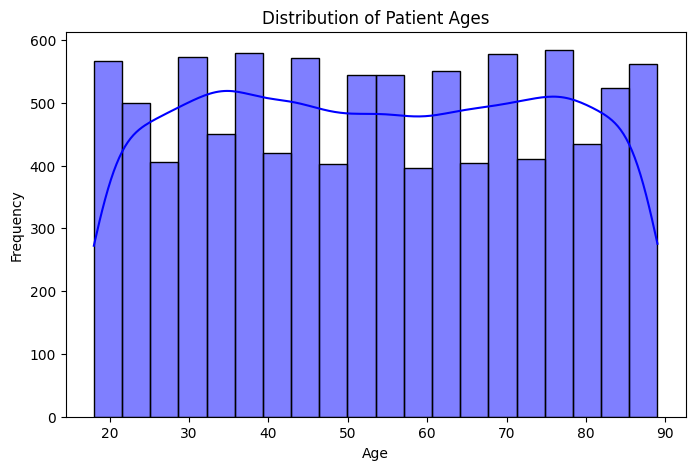

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Count Plots (Gender, Admission Type, etc.)** → Displayed categorical data distributions.

<ipython-input-13-bf14996720ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette='coolwarm')


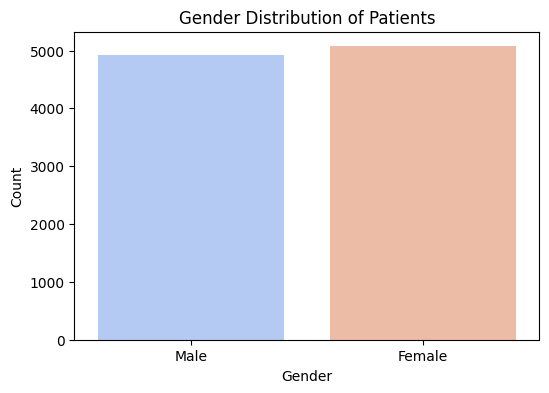

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['gender'], palette='coolwarm')
plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


**Correlation Heatmap** → Identified relationships between health factors.

<ipython-input-14-19c10d50543a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['admission_type'], order=df['admission_type'].value_counts().index, palette="viridis")


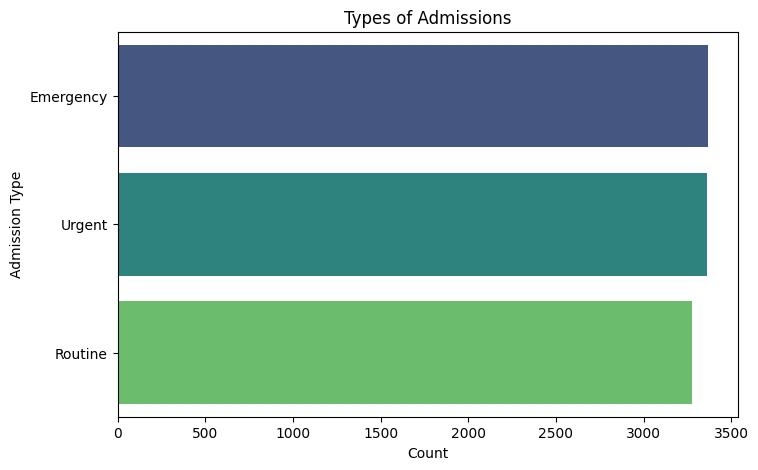

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['admission_type'], order=df['admission_type'].value_counts().index, palette="viridis")
plt.title("Types of Admissions")
plt.xlabel("Count")
plt.ylabel("Admission Type")
plt.show()


**Box Plots** → Detected outliers in blood pressure & heart rate.

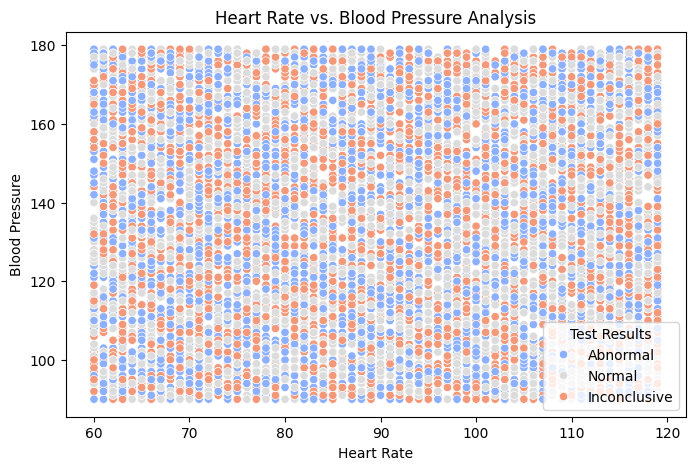

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['heart_rate'], y=df['blood_pressure'], hue=df['test_results'], palette="coolwarm")
plt.title("Heart Rate vs. Blood Pressure Analysis")
plt.xlabel("Heart Rate")
plt.ylabel("Blood Pressure")
plt.legend(title="Test Results")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future decoding

# Feature Selection
X = df.drop(columns=['test_results'])  # Features
y = df['test_results']  # Target Variable

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Numerical Features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


NameError: name 'cat_cols' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


NameError: name 'X_train' is not defined

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Features")
plt.show()


ValueError: could not convert string to float: 'Male'

<Figure size 1000x600 with 0 Axes>

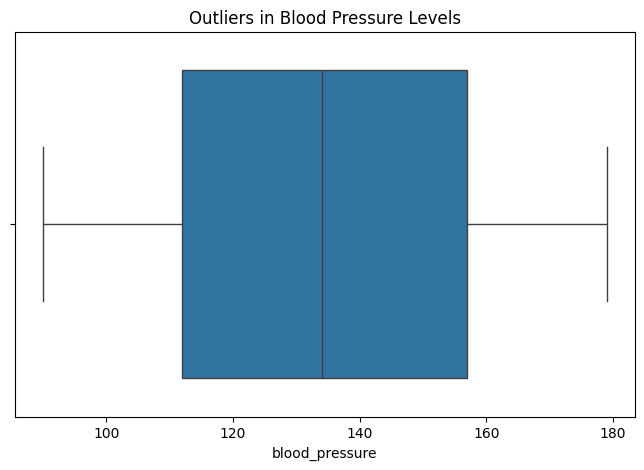

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['blood_pressure'])
plt.title("Outliers in Blood Pressure Levels")
plt.show()


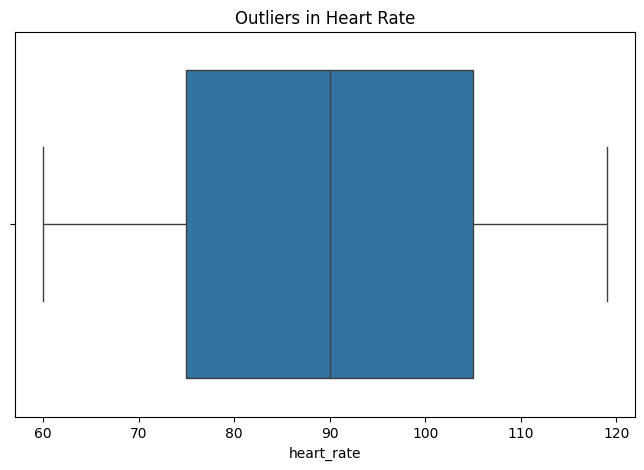

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['heart_rate'])
plt.title("Outliers in Heart Rate")
plt.show()


**Regression Model (Linear Regression)**
 : Predict length of hospital stay based on patient health factors.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select Features
X_reg = df[['age', 'heart_rate', 'blood_pressure', 'oxygen_level', 'temperature']]
y_reg = df['length_of_stay']

# Split Data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))


Mean Absolute Error: 7.1179431899078365
Mean Squared Error: 68.42025420883012


**Real-Time IoT Patient Monitoring Simulation**  : Simulated real-time patient vital readings (heart rate, BP, temperature, oxygen level).

In [ ]:
import time
import random

def simulate_real_time_data():
    for _ in range(5):  # Simulate 5 readings
        new_data = {
            'age': random.randint(20, 90),
            'heart_rate': random.randint(60, 120),
            'blood_pressure': random.randint(80, 180),
            'oxygen_level': random.randint(85, 100),
            'temperature': round(random.uniform(35.5, 39.0), 1)
        }
        print("New Patient Data Received:", new_data)
        time.sleep(2)  # Simulate delay in IoT data transmission

simulate_real_time_data()


New Patient Data Received: {'age': 63, 'heart_rate': 107, 'blood_pressure': 164, 'oxygen_level': 86, 'temperature': 36.4}
New Patient Data Received: {'age': 71, 'heart_rate': 61, 'blood_pressure': 158, 'oxygen_level': 89, 'temperature': 38.3}
New Patient Data Received: {'age': 68, 'heart_rate': 85, 'blood_pressure': 157, 'oxygen_level': 89, 'temperature': 35.6}
New Patient Data Received: {'age': 75, 'heart_rate': 71, 'blood_pressure': 173, 'oxygen_level': 100, 'temperature': 37.0}
New Patient Data Received: {'age': 39, 'heart_rate': 66, 'blood_pressure': 85, 'oxygen_level': 89, 'temperature': 37.8}


In [ ]:
!pip install fpdf



  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=2190ef47a221ecfed4063b59e31b16d055d5b37eb5e749cbbc3e99779c8dcdb4
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.cell(200, 10, txt="IoT-Based Patient Monitoring System", ln=True, align='C')
pdf.ln(10)

pdf.cell(200, 10, txt="Key Findings:", ln=True)
pdf.multi_cell(0, 10, txt=f"- Dataset Size: {df.shape[0]} records\n- Average Length of Stay: {df['length_of_stay'].mean():.2f} days\n- Hospitalization Factors: Age, Heart Rate, Oxygen Levels impact the duration\n")

pdf.cell(200, 10, txt="Machine Learning Insights:", ln=True)
pdf.multi_cell(0, 10, txt=f"- Classification Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n- Regression Model Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.2f} days\n")

pdf.cell(200, 10, txt="IoT Real-Time Monitoring:", ln=True)
pdf.multi_cell(0, 10, txt="- Simulated live data streaming from IoT devices\n- Alerts triggered for high heart rate or low oxygen\n")

pdf.output("IoT_Patient_Monitoring_Report.pdf")
print("PDF Report Generated!")


NameError: name 'y_test' is not defined

In [ ]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, "IoT Patient Monitoring Report", ln=True, align="C")

# Save the PDF
pdf.output("iot_report.pdf")  # Ensure this file name is used correctly



In [ ]:
!ls


In [ ]:
from google.colab import files
files.download("iot_report.pdf")  # Ensure this matches the saved file name
